In [2]:
import nibabel as nib

In [186]:
import numpy as np
import glob
import pandas as pd

In [187]:
import matplotlib.pyplot as plt


In [188]:
test_set_list = glob.glob('cropforeground_test_set/*')

In [189]:
test_set_list = [x for x in test_set_list if ('mask' not in x)]

In [190]:
test_set_list

['cropforeground_test_set\\sub-r001s017_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r001s025_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r001s027_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r004s007_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r009s008_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r009s029_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r024s008_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r031s019_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r046s012_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz',
 'cropforeground_test_set\\sub-r052s016_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz']

# 1. module화 전 테스트

In [200]:
img = nib.load(test_set_list[2])
img.shape

(197, 233, 189)

In [201]:
img_array = img.get_fdata()

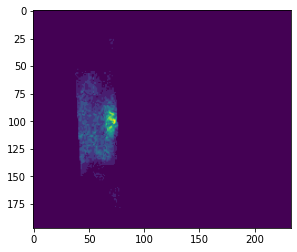

In [202]:
plt.imshow(img_array[:,:,187])

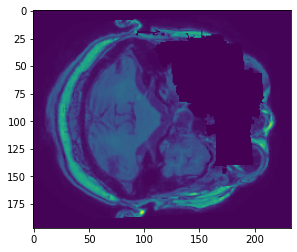

In [208]:
plt.imshow(img_array[:,:,30])

In [204]:
#note: z축 최상단측에 다음과 같은 노이즈 있으나 무시할만함

In [102]:
img_array[:,:,187]

array([[1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295],
       [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295],
       [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295],
       ...,
       [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295],
       [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295],
       [1.17791295, 1.17791295, 1.17791295, ..., 1.17791295, 1.17791295,
        1.17791295]])

In [103]:
img_array_z90 = img_array[:,:,90]

In [104]:
img_array_z90

array([[1.17791295, 1.17791295, 1.17791295, ..., 4.30307293, 3.60859323,
        1.17791295],
       [1.17791295, 1.17791295, 1.17791295, ..., 4.30307293, 2.56687307,
        3.60859323],
       [1.17791295, 1.17791295, 1.17791295, ..., 3.26135325, 3.26135325,
        3.60859323],
       ...,
       [1.17791295, 1.17791295, 1.17791295, ..., 2.91411304, 2.91411304,
        2.91411304],
       [1.17791295, 1.17791295, 1.17791295, ..., 3.26135325, 3.26135325,
        3.26135325],
       [1.17791295, 1.17791295, 1.17791295, ..., 3.9558332 , 3.26135325,
        4.30307293]])

In [105]:
non_zeros = np.nonzero(img_array_z90>2)

In [106]:
non_zeros

(array([  0,   0,   0, ..., 196, 196, 196], dtype=int64),
 array([ 20,  21,  22, ..., 230, 231, 232], dtype=int64))

In [107]:
non_zeros[1]

array([ 20,  21,  22, ..., 230, 231, 232], dtype=int64)

# 2. 배경값이 1.17정도의 값이라서 np.nonzeros에서 안잡혔던거라 06노트북 참고해도 되므로 다시 05번 노트북 참고

In [113]:
xmin_list, xmax_list, ymin_list, ymax_list, zmin_list, zmax_list = [],[],[],[],[],[]


for i in range(len(test_set_list)):
    raw_nii = nib.load(test_set_list[i])
    raw_nii_array = raw_nii.get_fdata()
    non_zeros = np.nonzero(raw_nii_array>3)

    x_min = non_zeros[0].min()
    x_max = non_zeros[0].max()

    y_min = non_zeros[1].min()
    y_max = non_zeros[1].max()

    z_min = non_zeros[2].min()
    z_max = non_zeros[2].max()
    
    xmin_list.append(x_min)
    xmax_list.append(x_max)
    
    ymin_list.append(y_min)
    ymax_list.append(y_max)
    
    zmin_list.append(z_min)
    zmax_list.append(z_max)

In [114]:
xmin_list

[5, 8, 5, 8, 3, 4, 0, 0, 12, 2]

In [116]:
xmax_list

[189, 187, 188, 186, 196, 194, 196, 196, 184, 193]

In [118]:
ymin_list

[4, 6, 0, 9, 0, 2, 0, 2, 0, 9]

In [176]:
def if_minus_return_0(value):
    
    if np.sign(value) == -1:
        value = 0
    else:
        value
        
    return value

def makenonzero3darray(nifti_file_path: str, save_path: str, margin: int) -> None:
    
    file_name = nifti_file_path.split('\\')[-1].rstrip('nii.gz')
    
    nii = nib.load(nifti_file_path)
    nii_array = nii.get_fdata()
    affine = nii.affine
    print(nii.shape)
    
    non_zeros = np.nonzero(raw_nii_array>3)

    x_min = non_zeros[0].min()
    x_max = non_zeros[0].max()

    y_min = non_zeros[1].min()
    y_max = non_zeros[1].max()

    z_min = non_zeros[2].min()
    z_max = non_zeros[2].max()
    
    
    
    clip_x_min = if_minus_return_0(x_min-margin)
    clip_x_max = if_minus_return_0(x_max+margin)
    
    clip_y_min = if_minus_return_0(y_min-margin)
    clip_y_max = if_minus_return_0(y_max-margin)
    
    clip_z_min = if_minus_return_0(z_min-margin)
    clip_z_max = if_minus_return_0(z_max-margin)
    
    
    
    nonzero3darray = nii_array[clip_x_min:clip_x_max, clip_y_min:clip_y_max, clip_z_min:clip_z_max]
    print(nonzero3darray.shape)
    
    img = nib.Nifti1Image(nonzero3darray, affine) 
    img.to_filename(f'{save_path}/nonzero3darray{file_name}.nii.gz')
    
    return None

In [177]:
makenonzero3darray(test_set_list[0], '.', 2)

(197, 233, 189)
(195, 216, 180)


In [178]:
# 3. 루프돌려서 전체 데이터셋 처리하기

[makenonzero3darray(test_set_path, '.', 2) for test_set_path in test_set_list]

(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)
(197, 233, 189)
(195, 216, 180)


[None, None, None, None, None, None, None, None, None, None]

# 4. 결과 정성적 확인

In [144]:
img = nib.load('nonzero3darraysub-r001s017_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz')
img.shape

(195, 216, 180)

In [145]:
img_array = img.get_fdata()

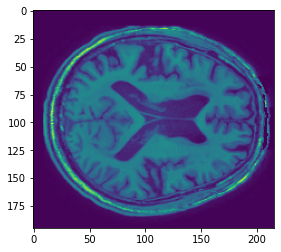

In [175]:
plt.imshow(img_array[:,:,90])